In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("iris.csv")
df.head()

,Id,sepallength,sepalwidth,petallength,petalwidth,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(153, 6)

In [7]:
df.columns

Index(['Id', 'sepallength', 'sepalwidth', 'petallength', 'petalwidth',
       'class'],
      dtype='object')

In [8]:
for col in df.select_dtypes('object'):
    print(col)
    print(df[col].unique())
    print("-------------")

class
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
-------------


In [9]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           153 non-null    int64  
 1   sepallength  152 non-null    float64
 2   sepalwidth   153 non-null    float64
 3   petallength  151 non-null    float64
 4   petalwidth   153 non-null    float64
 5   class        153 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.3+ KB


In [11]:
df.drop('Id',axis=1,inplace=True)

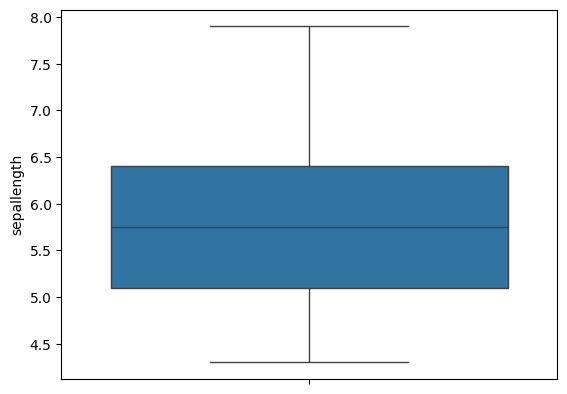

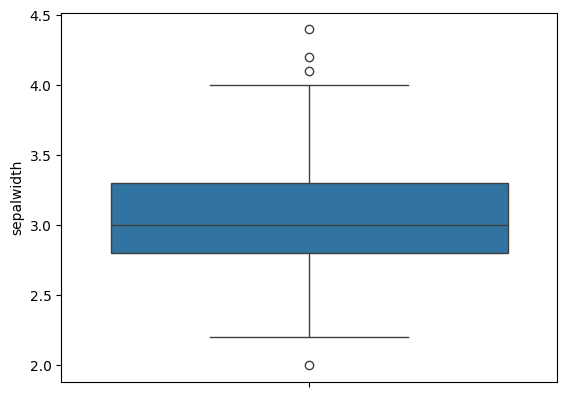

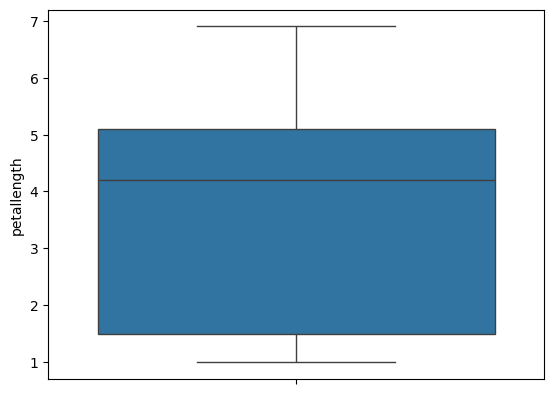

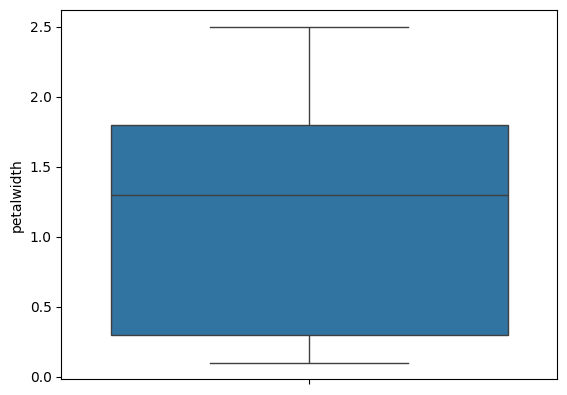

In [12]:
for col in df.select_dtypes("number"):
    sns.boxplot(df[col])
    plt.show()

In [13]:
q1 = np.percentile(df["sepalwidth"],25)
q3= np.percentile(df["sepalwidth"],75)
iqr = q3 - q1 

In [14]:
q1,q3,iqr,q3+1.5*iqr

(np.float64(2.8), np.float64(3.3), np.float64(0.5), np.float64(4.05))

In [15]:
df[df['sepalwidth']<q1-1.5*iqr]

,sepallength,sepalwidth,petallength,petalwidth,class
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [16]:
df[df['sepalwidth']>q3+1.5*iqr]

,sepallength,sepalwidth,petallength,petalwidth,class
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [17]:
df.drop(df[df['sepalwidth']>q3+1.5*iqr].index,inplace=True)

In [18]:
df.drop(df[df['sepalwidth']<q1-1.5*iqr].index,inplace=True)

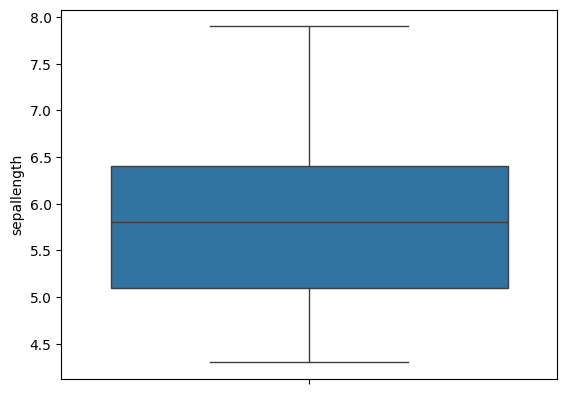

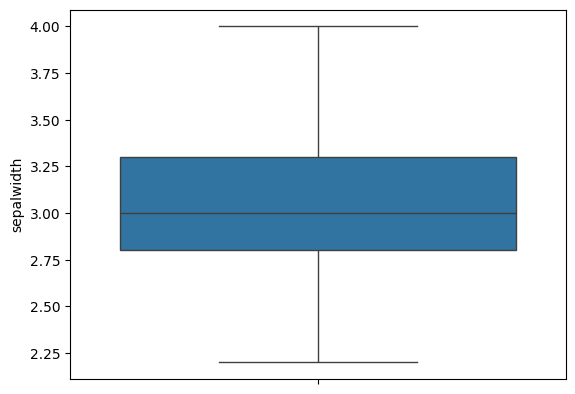

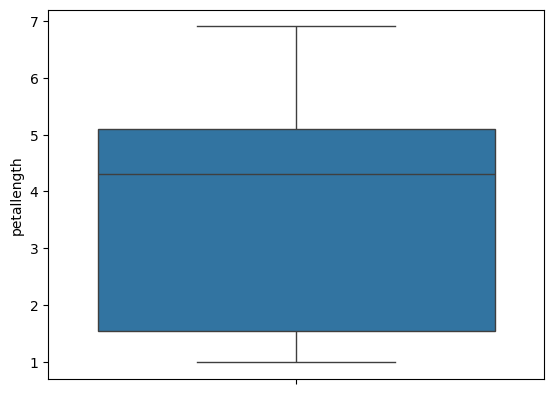

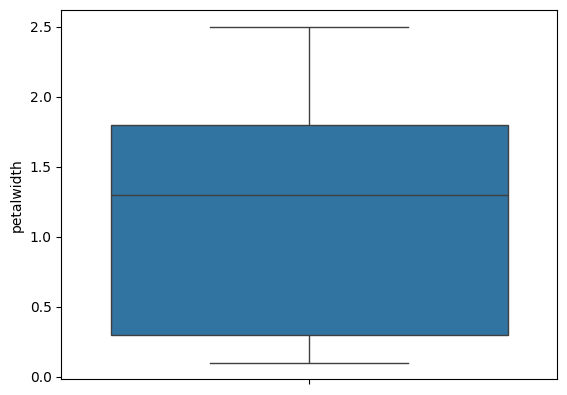

In [19]:
for col in df.select_dtypes("number"):
    sns.boxplot(df[col])
    plt.show()

In [20]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
148,6.2,3.4,NaN,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
150,5.1,3.5,1.4,0.2,Iris-setosa
151,4.9,3.0,1.4,0.2,Iris-setosa


<Axes: xlabel='petallength', ylabel='Count'>

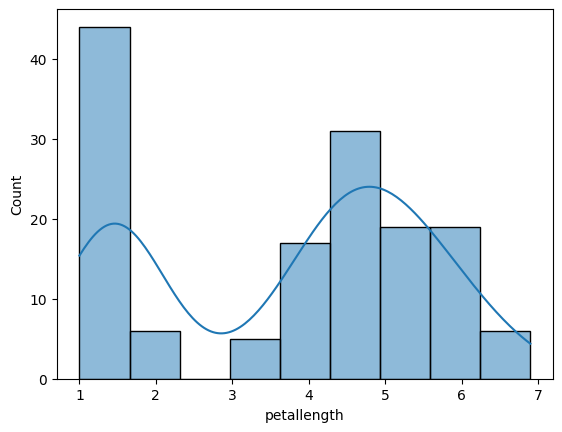

In [21]:
sns.histplot(df['petallength'],kde=True)

In [22]:
df.value_counts()

sepallength  sepalwidth  petallength  petalwidth  class         
4.9          3.1         1.5          0.1         Iris-setosa       3
4.7          3.2         1.3          0.2         Iris-setosa       2
4.9          3.0         1.4          0.2         Iris-setosa       2
5.1          3.5         1.4          0.2         Iris-setosa       2
5.8          2.7         5.1          1.9         Iris-virginica    2
                                                                   ..
7.7          2.6         6.9          2.3         Iris-virginica    1
             2.8         6.7          2.0         Iris-virginica    1
             3.0         6.1          2.3         Iris-virginica    1
             3.8         6.7          2.2         Iris-virginica    1
7.9          3.8         6.4          2.0         Iris-virginica    1
Name: count, Length: 140, dtype: int64

<Axes: xlabel='sepalwidth', ylabel='Count'>

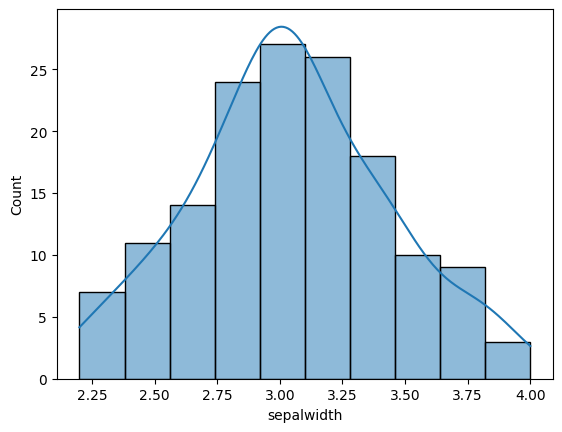

In [23]:
sns.histplot(df['sepalwidth'],kde=True)

In [24]:
df.isna().sum()

sepallength    1
sepalwidth     0
petallength    2
petalwidth     0
class          0
dtype: int64

In [25]:
df.isna().sum()/df.shape[0]

sepallength    0.006711
sepalwidth     0.000000
petallength    0.013423
petalwidth     0.000000
class          0.000000
dtype: float64

In [26]:
df['sepallength'].fillna(df['sepallength'].median(),inplace=True)

C:\Users\os474\AppData\Local\Temp\ipykernel_7204\2817381088.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sepallength'].fillna(df['sepallength'].median(),inplace=True)


In [27]:
df['petallength'].fillna(df['petallength'].median(),inplace=True)

C:\Users\os474\AppData\Local\Temp\ipykernel_7204\3719795428.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['petallength'].fillna(df['petallength'].median(),inplace=True)


In [28]:
df.isna().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 152
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  149 non-null    float64
 1   sepalwidth   149 non-null    float64
 2   petallength  149 non-null    float64
 3   petalwidth   149 non-null    float64
 4   class        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [30]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-virginica     50
Iris-versicolor    49
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()

In [33]:
df['class'] =label_encoder.fit_transform(df["class"])
df['class'].value_counts()

class
0    50
2    50
1    49
Name: count, dtype: int64

<Axes: xlabel='sepalwidth', ylabel='petalwidth'>

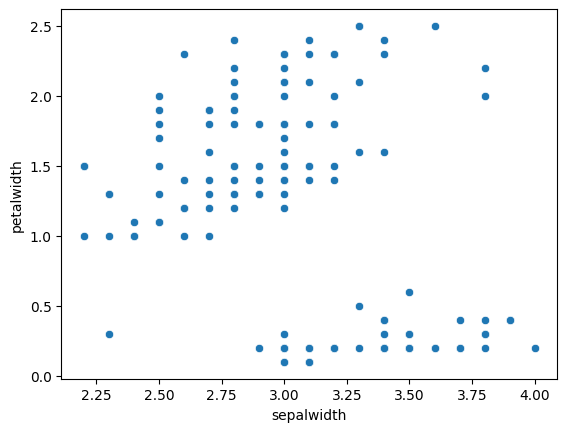

In [34]:
sns.scatterplot(data=df,x = 'sepalwidth', y="petalwidth")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 152
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  149 non-null    float64
 1   sepalwidth   149 non-null    float64
 2   petallength  149 non-null    float64
 3   petalwidth   149 non-null    float64
 4   class        149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [36]:
df.isna().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df.drop('class',axis=1,inplace=False)
y = df['class']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle =True)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=42)
LogisticRegressionModel.fit(X_train, y_train)


c:\Program Files\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=42, solver='sag')

In [42]:
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)

In [43]:
print('LogisticRegressionModel Train Score is : ' , (LogisticRegressionModel.score(X_train, y_train))*100)
print('LogisticRegressionModel Test Score is : ' , (LogisticRegressionModel.score(X_test, y_test))*100)
print('----------------------------------------------------')

LogisticRegressionModel Train Score is :  96.96969696969697
LogisticRegressionModel Test Score is :  96.0
----------------------------------------------------


In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
CM = confusion_matrix(y_test, y_pred)
CM

array([[19,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 16]])

In [46]:
from sklearn.metrics import f1_score

In [47]:
from sklearn.metrics import classification_report

In [48]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.87      0.93        15
           2       0.89      1.00      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

